In [48]:
!pip install -U portalocker>=2.0.0

In [1]:
import pandas as pd
import seaborn as sns
import spacy
import re
from wordcloud import WordCloud
from tqdm import tqdm
tqdm.pandas()
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('twitter_training.csv', header=None)

# Dodaj własne nagłówki
data.columns = ['ID', 'game', 'label', 'text']

# Wyświetl kilka losowych wierszy, aby sprawdzić wyniki
data.sample(5)

,ID,game,label,text
37511,5231,Hearthstone,Negative,@PlayHearthstone the amount of delays and cras...
42854,10151,PlayerUnknownsBattlegrounds(PUBG),Negative,You fools think the game will increase our GDP...
15371,3030,Dota2,Positive,soon i can fully enjoy watching melee again. i...
58265,11589,TomClancysRainbowSix,Neutral,This Family.
60897,4835,GrandTheftAuto(GTA),Irrelevant,Someone called the GTA big slums of Ontario. W...


In [3]:
cols_to_drop = ['ID','game']
data = data.drop(cols_to_drop,axis=1)
data.sample(5)

,label,text
35025,Irrelevant,Fraudsters use targeting . Catch all .
49033,Negative,"I woke up early, had my coffee and could just ..."
53123,Neutral,NaN
22484,Positive,I consider csgo the best competitive shooter e...
44727,Negative,Verizon just took my whole place Lmfaoo bastards


In [4]:
data = data[~data['label'].isin(['Neutral', 'Irrelevant'])]

data.sample(5)

,label,text
2168,Negative,That's why I didn't buy Borders 3. Randy Pitch...
21796,Positive,They “ and Of course!.. You ’ re the best gami...
1115,Positive,YO! Epic giveaway<unk>! proceeds to gift out 2...
43656,Positive,I’m playing and streaming
68893,Negative,NOOOOOO!!!! pic.twitter.com / jEtvnkc7OC


In [34]:
data['label'] = data['label'].replace({'Positive': 1, 'Negative': 0})

<Axes: xlabel='label', ylabel='count'>

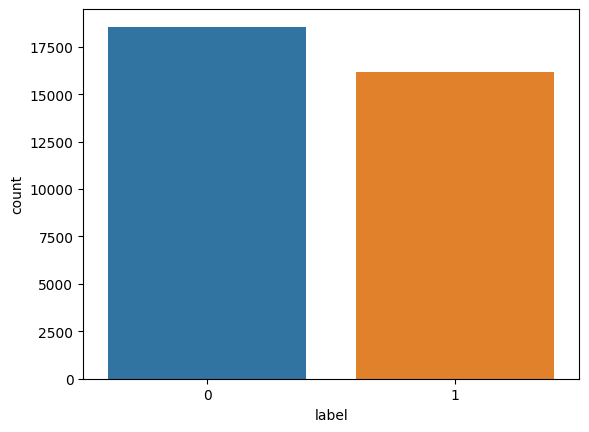

In [35]:
sns.countplot(x='label', data=data)

In [36]:
data = data.dropna(axis=0)

In [37]:
data['text'] = data['text'].str.lower()
data.sample(5)

,label,text
66201,0,can not explain
3332,0,love black op modern warfare cold war shit
33891,1,fortnitegame igyou put star war lightsaber gam...
66992,1,damn smell tho use picfacebookcom atrkkld
58458,0,facebook liberal sanction chinese propaganda h...


In [38]:
re_url = re.compile(r'((www.[^\s]+)|(https?://[^\s]+))')
data['text'] = data['text'].apply(lambda x: re_url.sub('', x))

re_letter = re.compile(r"[^a-z\s']")
data['text'] = data['text'].apply(lambda x: re_letter.sub('', x))
data.sample(10)

,label,text
26425,1,sarahschachner get news jesperkyd einar kvitra...
58206,1,spawn peek doc rainbowgame life
97,0,ground look cool despite borderline unfunny wr...
28037,1,fast mastiff run
2162,1,look forward join border force boot oval
20370,1,movie wipe slate clean start scratch cry tear ...
4240,0,football game suck
38384,0,playhearthstone late update android turn battl...
18308,0,sony you be think make console big want stop p...
32011,1,boyfriend take league legend love swarm


In [9]:
!pip install -U spacy
!python -m spacy download en_core_web_sm



2024-01-07 15:33:13.558717: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-07 15:33:13.558822: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-07 15:33:13.561550: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-07 15:33:15.735180: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
import spacy
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('sentencizer')

In [12]:
def remove_stopwords(text):
  return ' '.join(filter(lambda x: x not in nlp.Defaults.stop_words, text.split()))

data['text'] = data['text'].apply(remove_stopwords)
data.sample(10)


,label,text
56581,Positive,admire new decorations renovated house shortxm...
7988,Negative,look overwatch dead horse surrounded bunch guy...
42859,Negative,celebrities question ban pubg pakistan thepaki...
71656,Negative,ghostrecon co ubisoft ubisoftsupport ubisoftpa...
47156,Positive,bought house new town lowes min st nd shopping...
74480,Negative,global prices sentiment global market looks we...
73867,Negative,nvidia it's ridiculous soon notification stock...
11916,Negative,nbak terrible game
37739,Positive,powerful minion stir shadowflame good storm
13760,Negative,nk niggas drifting body passing body jumping b...


In [13]:
data.drop_duplicates(subset='text', keep='first', inplace=True)

In [14]:
def lemmatize(text):
  return ' '.join([x.lemma_ for x in nlp(text)])

data['text'] = data['text'].progress_apply(lemmatize)
data.sample(10)

100%|██████████| 34718/34718 [04:53<00:00, 118.20it/s]


,label,text
28620,Positive,whoa
55239,Negative,modern warfare break duty nowadays developer k...
69165,Negative,I be call cyberpunk let absolute piece shit ga...
23962,Positive,happy th anniversary hip car hop love music so...
48270,Positive,foot skeleton home depot want house yard badly...
44670,Positive,optimum ct pay ny exact service time leave opt...
40865,Positive,love watch battlefield dice ea make know nah n...
41815,Positive,battlefield fantastic game today we will explo...
47388,Positive,see wall home depot lead believe fourth wall h...
39385,Positive,love core stone flow people


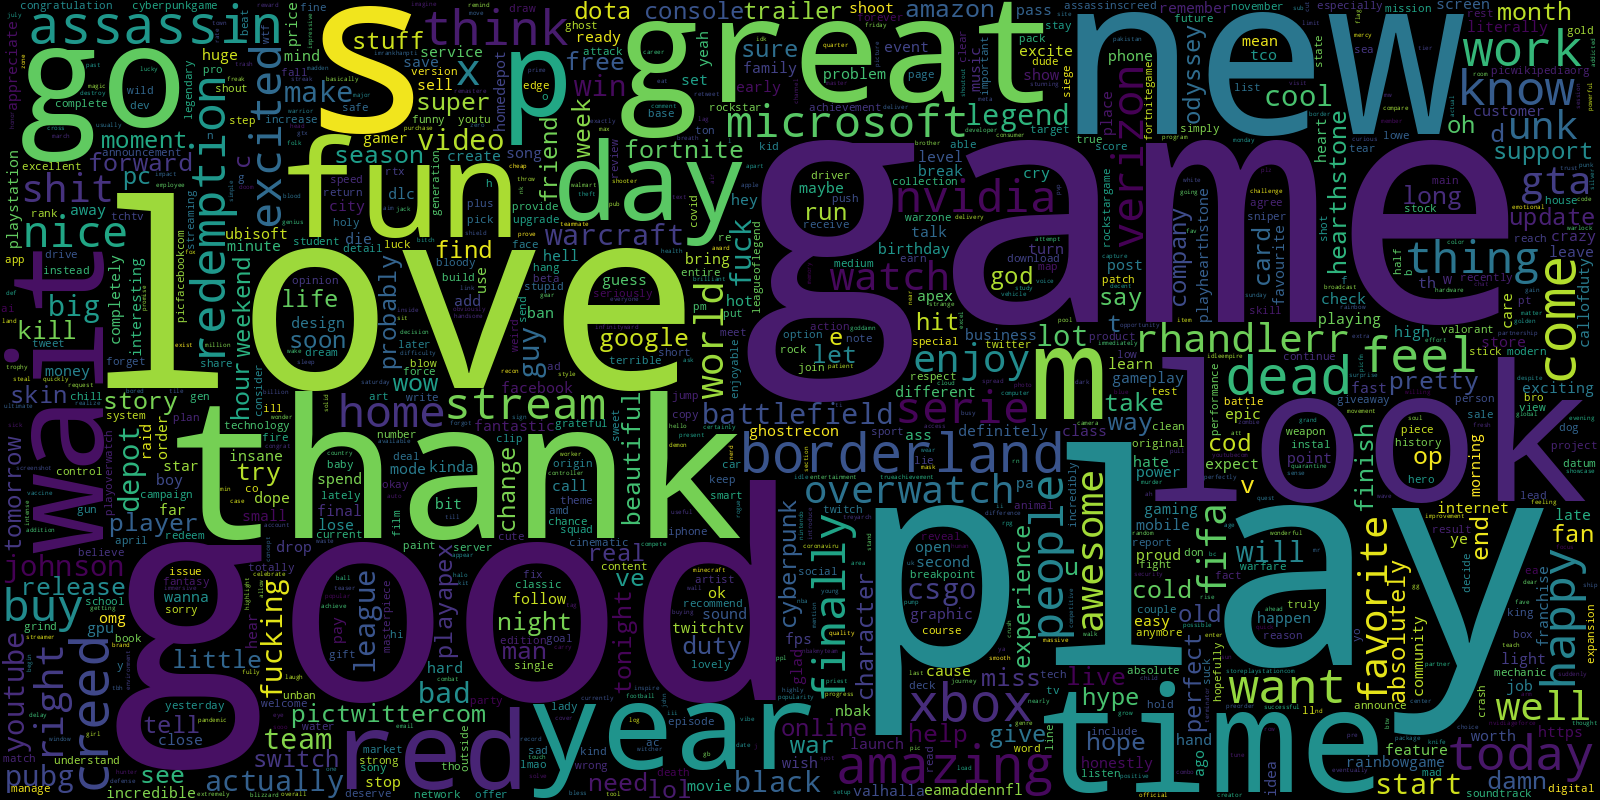

In [39]:
positive = ' '.join(data[data['label']==1]['text'])

wc_positive = WordCloud(max_words=1000, width = 1600, height = 800, collocations=False).generate(positive)
wc_positive.to_image()

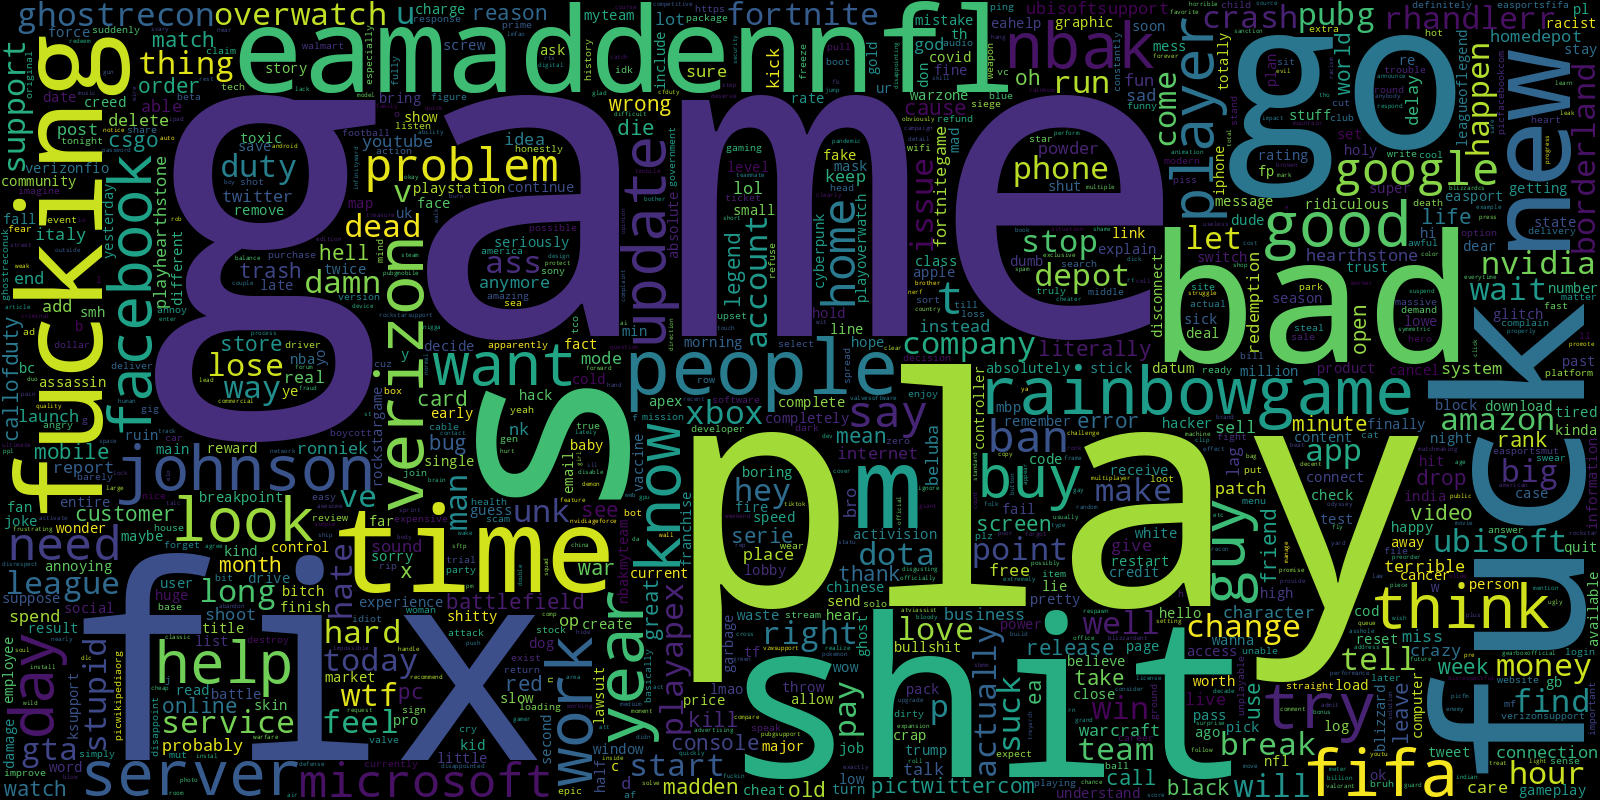

In [40]:
negative = ' '.join(data[data['label']==0]['text'])

wc_negative = WordCloud(max_words=1000, width = 1600, height = 800, collocations=False).generate(negative)
wc_negative.to_image()

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus,n,g):
  vec=CountVectorizer(ngram_range=(g,g)).fit(corpus)
  bag_of_words=vec.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word ,idx in vec.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
  return words_freq[:n]

In [42]:
X_train,X_val,y_train,y_val=train_test_split(data.text,data.label,test_size=0.1,random_state=42)

In [43]:


X_train.shape,y_train.shape



((31246,), (31246,))

In [44]:


X_val.shape,y_val.shape



((3472,), (3472,))

In [45]:
max_features=1000
maxlen=300

In [46]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text

tokenizer=text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train=tokenizer.texts_to_sequences(X_train)
X_train=pad_sequences(tokenized_train,maxlen=maxlen)

In [47]:


X_val = [str(x) for x in X_val]



In [48]:


tokenized_test=tokenizer.texts_to_sequences(X_val)
X_val=pad_sequences(tokenized_test,maxlen=maxlen)



In [49]:
batch_size=256
epochs=9
embed_size=100

In [50]:
from keras.callbacks import ReduceLROnPlateau

learning_rate=ReduceLROnPlateau(monitor='val_accuracy',
                                patirnce=2,verbose=1,factor=-.5,min_lr=0.00001)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D
import keras


model=Sequential()
model.add(Embedding(max_features,output_dim=embed_size,
                    input_length=maxlen,trainable=False))
model.add(LSTM(units=128,return_sequences=True,recurrent_dropout=0.25,dropout=0.25))
model.add(LSTM(units=64,recurrent_dropout=0.1,dropout=0.1))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 100)          100000    
                                                                 
 lstm_2 (LSTM)               (None, 300, 128)          117248    
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 268769 (1.03 MB)
Trainable params: 168769 (659.25 KB)
Non-trainable params: 100000 (390.62 KB)
_________________________________________________________________


In [52]:
lstm_model=model.fit(X_train,y_train,batch_size=batch_size,
                  validation_data=(X_val,y_val),epochs=epochs,
                  callbacks=[learning_rate])

Epoch 1/9
123/123 [==============================] - 607s 5s/step - loss: 0.6697 - accuracy: 0.5778 - val_loss: 0.6199 - val_accuracy: 0.6599 - lr: 0.0010
Epoch 2/9
123/123 [==============================] - 591s 5s/step - loss: 0.6280 - accuracy: 0.6456 - val_loss: 0.6156 - val_accuracy: 0.6486 - lr: 0.0010
Epoch 3/9
123/123 [==============================] - 584s 5s/step - loss: 0.6133 - accuracy: 0.6589 - val_loss: 0.5904 - val_accuracy: 0.6938 - lr: 0.0010
Epoch 4/9
123/123 [==============================] - 593s 5s/step - loss: 0.6042 - accuracy: 0.6710 - val_loss: 0.5822 - val_accuracy: 0.7077 - lr: 0.0010
Epoch 5/9
123/123 [==============================] - 593s 5s/step - loss: 0.5970 - accuracy: 0.6723 - val_loss: 0.5730 - val_accuracy: 0.7100 - lr: 0.0010
Epoch 6/9
123/123 [==============================] - 593s 5s/step - loss: 0.5904 - accuracy: 0.6813 - val_loss: 0.5610 - val_accuracy: 0.7186 - lr: 0.0010
Epoch 7/9
123/123 [==============================] - 593s 5s/step - lo

In [53]:
print(" Accuracy on Val data: ",model.evaluate(X_val,y_val)[1] *100 ,"%")

109/109 [==============================] - 22s 202ms/step - loss: 0.5336 - accuracy: 0.7307
 Accuracy on Val data:  73.07027578353882 %


In [54]:
def prepare_sentence(sentence):

    sentence = sentence.lower()

    re_url = re.compile(r'((www.[^\s]+)|(https?://[^\s]+))')
    sentence = re_url.sub('', sentence)

    re_letter = re.compile(r"[^a-z\s']")
    sentence = re_letter.sub('', sentence)

    def remove_stopwords(text):
        return ' '.join(filter(lambda x: x not in nlp.Defaults.stop_words, text.split()))

    sentence = remove_stopwords(sentence)

    def lemmatize(text):
        return ' '.join([x.lemma_ for x in nlp(text)])

    sentence = lemmatize(sentence)

    tokenized_sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(tokenized_sentence, maxlen=maxlen, padding='post')

    return sentence

In [55]:
def predict_sentiment(model, sentence):

    prepared_sentence = prepare_sentence(sentence)
    prediction = model.predict(prepared_sentence)

    if prediction >= 0.5:
        return "POSITIVE SENTENCE"
    else:
        return "NEGATIVE SENTENCE"

In [64]:
sentence = "I love this game"
result = predict_sentiment(model, sentence)
print(result)

1/1 [==============================] - 0s 89ms/step
POSITIVE SENTENCE
